### Credit Score Prediction:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'credit score.csv')

In [3]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [10]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
# Drop all irrelevant columns:
# Column SSN--> Social Security Number
df=df.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [12]:
df.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [13]:
df.shape

(100000, 24)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [15]:
# Column--> Month

df['Month'] = df['Month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8})

In [16]:
# Column--> Age

df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [17]:
df['Age']= df['Age'].str.replace('_','')

In [18]:
df['Age']= df['Age'].str.replace('-','').astype(int)

In [19]:
df['Age'].dtype

dtype('int32')

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Age']= le.fit_transform(df['Age'])

<AxesSubplot:xlabel='Age'>

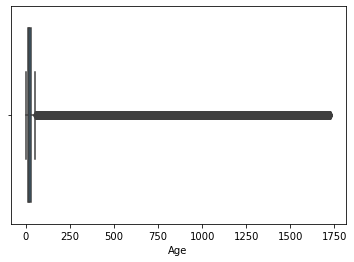

In [22]:
#Outliers-
sns.boxplot(df['Age'])

In [23]:
Q1= df['Age'].quantile(0.25)
Q3= df['Age'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Age']>= Q1-1.5*IQR) & (df['Age']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Age'>

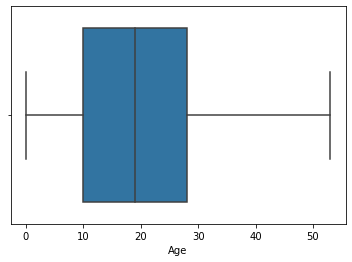

In [24]:
# After remove the outliers:
sns.boxplot(df['Age'])

In [25]:
# Column--> Occupation

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Occupation']= le.fit_transform(df['Occupation'])

In [26]:
# Column--> Annual_Income

df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [27]:
df['Annual_Income']= df['Annual_Income'].str.replace('_','').astype(float)
df['Annual_Income'].dtype

dtype('float64')

<AxesSubplot:xlabel='Annual_Income'>

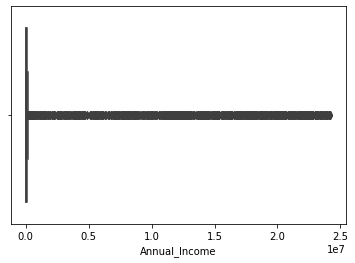

In [28]:
# Check Outliers 
sns.boxplot(df['Annual_Income'])

In [29]:
Q1= df['Annual_Income'].quantile(0.25)
Q3= df['Annual_Income'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Annual_Income']>= Q1-1.5*IQR) & (df['Annual_Income']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Annual_Income'>

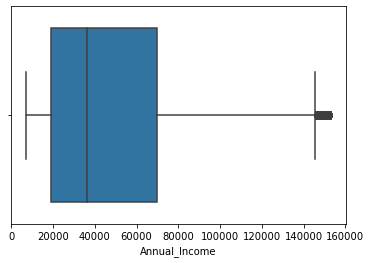

In [30]:
# After dealing with Outliers-
sns.boxplot(df['Annual_Income'])

In [31]:
# Column--> Monthly_Inhand_Salary

In [32]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [33]:
df['Monthly_Inhand_Salary']= df['Monthly_Inhand_Salary'].replace(np.nan, 0)

In [34]:
df['Monthly_Inhand_Salary'].isna().sum()

0

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

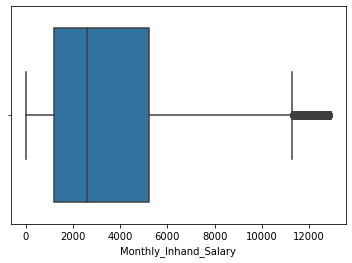

In [35]:
# Outliers-
sns.boxplot(df['Monthly_Inhand_Salary'])

In [36]:
Q1= df['Monthly_Inhand_Salary'].quantile(0.25)
Q3= df['Monthly_Inhand_Salary'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Monthly_Inhand_Salary']>= Q1-1.5*IQR) & (df['Monthly_Inhand_Salary']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

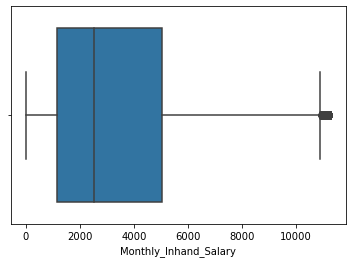

In [37]:
sns.boxplot(df['Monthly_Inhand_Salary'])

In [38]:
# Column--> Num_Bank_Accounts

df['Num_Bank_Accounts'].isna().sum()

0

<AxesSubplot:xlabel='Num_Bank_Accounts'>

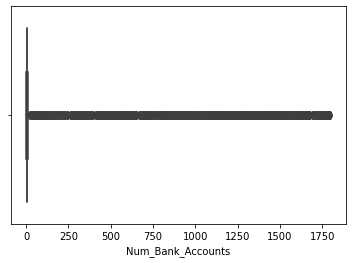

In [39]:
# Outliers-

sns.boxplot(df['Num_Bank_Accounts'])

In [40]:
Q1= df['Num_Bank_Accounts'].quantile(0.25)
Q3= df['Num_Bank_Accounts'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Num_Bank_Accounts']>= Q1-1.5*IQR) & (df['Num_Bank_Accounts']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Num_Bank_Accounts'>

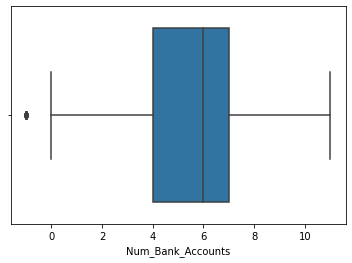

In [41]:
# After handling Outliers-
sns.boxplot(df['Num_Bank_Accounts'])

In [42]:
# Column--> Num_Credit_Card

df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  686,  955,  679], dtype=int64)

<AxesSubplot:xlabel='Num_Credit_Card'>

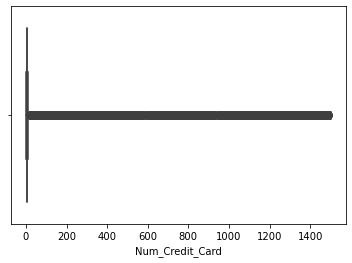

In [43]:
# Outliers-
sns.boxplot(df['Num_Credit_Card'])

In [44]:
Q1= df['Num_Credit_Card'].quantile(0.25)
Q3= df['Num_Credit_Card'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Num_Credit_Card']>= Q1-1.5*IQR) & (df['Num_Credit_Card']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Num_Credit_Card'>

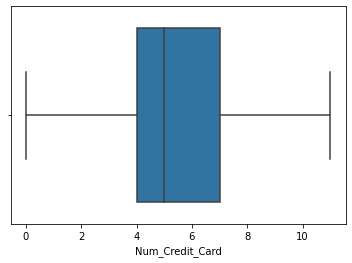

In [45]:
# After dealing with outliers-
sns.boxplot(df['Num_Credit_Card'])

In [46]:
# Column: Interest_Rate
df['Interest_Rate'].unique()

array([   3,    6,    8, ..., 1347,  387, 5729], dtype=int64)

<AxesSubplot:xlabel='Interest_Rate'>

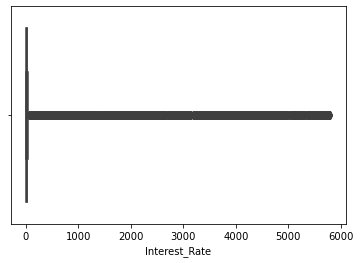

In [47]:
# Outliers-
sns.boxplot(df['Interest_Rate'])

In [48]:
Q1= df['Interest_Rate'].quantile(0.25)
Q3= df['Interest_Rate'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Interest_Rate']>= Q1-1.5*IQR) & (df['Interest_Rate']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Interest_Rate'>

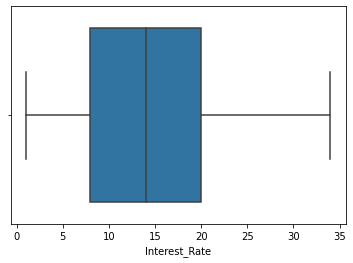

In [49]:
# After remove outliers-
sns.boxplot(df['Interest_Rate'])

In [50]:
# Column--> Num_of_Loan

df['Num_of_Loan']= df['Num_of_Loan'].str.replace('_','')

In [51]:
df['Num_of_Loan']= df['Num_of_Loan'].str.replace('-','').astype(int)

<AxesSubplot:xlabel='Num_of_Loan'>

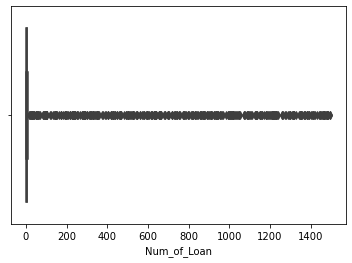

In [52]:
# Outliers-
sns.boxplot(df['Num_of_Loan'])

In [53]:
Q1= df['Num_of_Loan'].quantile(0.25)
Q3= df['Num_of_Loan'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Num_of_Loan']>= Q1-1.5*IQR) & (df['Num_of_Loan']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Num_of_Loan'>

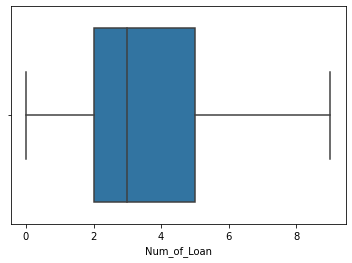

In [54]:
# after remove outlier-
sns.boxplot(df['Num_of_Loan'])

In [55]:
# Column--> Type_of_Loan
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [56]:
df['Type_of_Loan']=le.fit_transform(df['Type_of_Loan'])

In [57]:
# Column--> Delay_from_due_date

In [58]:
df['Delay_from_due_date']=df['Delay_from_due_date'].replace('-','')

In [59]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7,  0,  9,  1, 10, 30, 31, 34, 27, 14, 11, 13,
        4,  2, -2, 16, 17, 15, 23, 22, 21, 12, 18, 19, 52, 51, 48, 53, 43,
       25, 20, 47, 46, 49, 24, 28, 61, 26, 29, 58, 45, 55, 56, 59, 57, 54,
       62, 65, 64, 67, 50, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

<AxesSubplot:xlabel='Delay_from_due_date'>

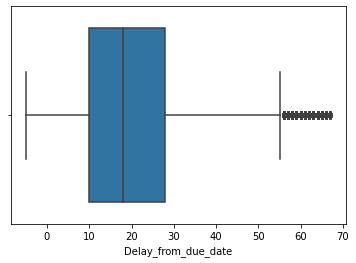

In [60]:
sns.boxplot(df['Delay_from_due_date'])

In [61]:
df['Delay_from_due_date'].isna().sum()

0

In [62]:
Q1= df['Delay_from_due_date'].quantile(0.25)
Q3= df['Delay_from_due_date'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Delay_from_due_date']>= Q1-1.5*IQR) & (df['Delay_from_due_date']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Delay_from_due_date'>

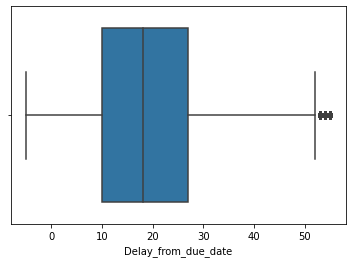

In [63]:
# After remove Outliers-
sns.boxplot(df['Delay_from_due_date'])

In [64]:
# Column--> Num_of_Delayed_Payment

df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].str.replace('_','')

In [65]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].replace('-','')

In [66]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].replace(np.nan, 0)

In [67]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].astype(int)

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

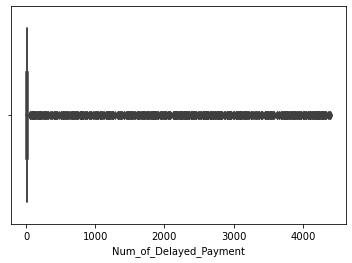

In [68]:
# Check the outliers:
sns.boxplot(df['Num_of_Delayed_Payment'])

In [69]:
Q1= df['Num_of_Delayed_Payment'].quantile(0.25)
Q3= df['Num_of_Delayed_Payment'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Num_of_Delayed_Payment']>= Q1-1.5*IQR) & (df['Num_of_Delayed_Payment']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

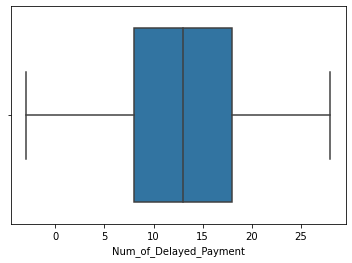

In [70]:
# After remove outlier-
sns.boxplot(df['Num_of_Delayed_Payment'])

In [71]:
# Column--> Changed_Credit_Limit
df['Changed_Credit_Limit'].unique()

array(['11.27', '6.27', '9.27', ..., '-0.9500000000000002',
       '17.509999999999998', '25.16'], dtype=object)

In [72]:
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].replace('-','')

In [73]:
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].str.replace('_','')

In [74]:
df['Changed_Credit_Limit']= pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce') 

In [75]:
df['Changed_Credit_Limit']= df['Changed_Credit_Limit'].replace(np.nan, 0)

In [76]:
df['Changed_Credit_Limit'].isna().sum()

0

<AxesSubplot:xlabel='Changed_Credit_Limit'>

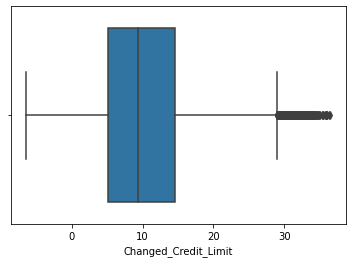

In [77]:
# Check Outliers-
sns.boxplot(df['Changed_Credit_Limit'])

In [78]:
Q1= df['Changed_Credit_Limit'].quantile(0.25)
Q3= df['Changed_Credit_Limit'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Changed_Credit_Limit']>= Q1-1.5*IQR) & (df['Changed_Credit_Limit']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Changed_Credit_Limit'>

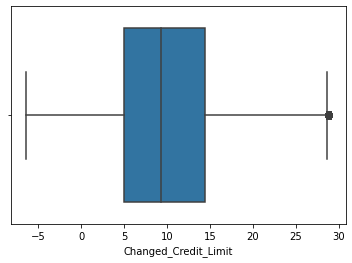

In [79]:
# After remove outliers-
sns.boxplot(df['Changed_Credit_Limit'])

In [80]:
# Column--> Num_Credit_Inquiries
df['Num_Credit_Inquiries'].unique()

array([4.000e+00, 2.000e+00,       nan, ..., 2.448e+03, 1.361e+03,
       7.400e+01])

In [81]:
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].replace(np.nan, 0)

In [82]:
df['Num_Credit_Inquiries'].isna().sum()

0

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

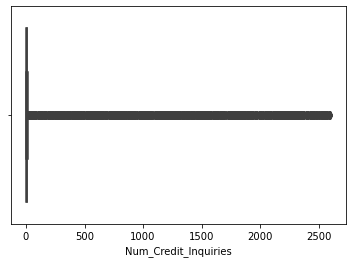

In [83]:
#Check Outliers-
sns.boxplot(df['Num_Credit_Inquiries'])

In [84]:
Q1= df['Num_Credit_Inquiries'].quantile(0.25)
Q3= df['Num_Credit_Inquiries'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Num_Credit_Inquiries']>= Q1-1.5*IQR) & (df['Num_Credit_Inquiries']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

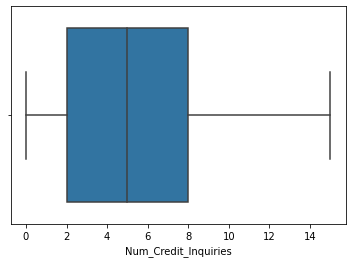

In [85]:
# After handling outliers-
sns.boxplot(df['Num_Credit_Inquiries'])

In [86]:
# Column--> Credit_Mix

df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [87]:
df['Credit_Mix']= df['Credit_Mix'].replace('_','None')

In [88]:
df['Credit_Mix'].unique()

array(['None', 'Good', 'Standard', 'Bad'], dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])

In [91]:
df['Credit_Mix'].unique()

array([2, 1, 3, 0])

In [92]:
# Column--> Outstanding_Debt
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [93]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_','').astype(float)

In [94]:
df['Outstanding_Debt'].dtype

dtype('float64')

In [95]:
# Column--> Credit_Utilization_Ratio
df['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 31.37786187, ..., 40.56563096,
       33.63820798, 34.19246265])

In [96]:
df['Credit_Utilization_Ratio'].isna().sum()

0

In [97]:
# Column--> Credit_History_Age 

df['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
Name: Credit_History_Age, dtype: object

In [98]:
df['Credit_History_Age']= le.fit_transform(df['Credit_History_Age'])

In [99]:
df['Credit_History_Age'].isna().sum()

0

In [100]:
# Column--> Payment_of_Min_Amount

df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [101]:
df['Payment_of_Min_Amount']= le.fit_transform(df['Payment_of_Min_Amount'])

In [102]:
df['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [103]:
# Column--> Total_EMI_per_month

df['Total_EMI_per_month'].isna().sum()

0

<AxesSubplot:xlabel='Total_EMI_per_month'>

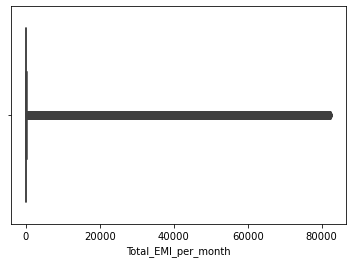

In [104]:
sns.boxplot(df['Total_EMI_per_month'])

In [105]:
Q1= df['Total_EMI_per_month'].quantile(0.25)
Q3= df['Total_EMI_per_month'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Total_EMI_per_month']>= Q1-1.5*IQR) & (df['Total_EMI_per_month']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Total_EMI_per_month'>

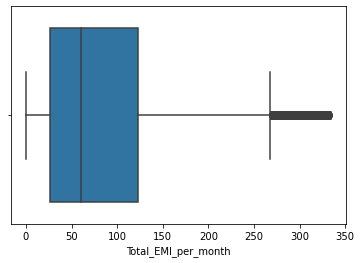

In [106]:
# After remove outliers-
sns.boxplot(df['Total_EMI_per_month'])

In [107]:
# Column--> Amount_invested_monthly

df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '199.4580743910713',
       ..., '54.18595028760385', '251.67258219721603',
       '167.1638651610451'], dtype=object)

In [108]:
#df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.replace('_','')

In [109]:
df['Amount_invested_monthly']= df['Amount_invested_monthly'].str.replace('_','')

In [110]:
df['Amount_invested_monthly']= df['Amount_invested_monthly'].astype(float)

In [111]:
df['Amount_invested_monthly']= df['Amount_invested_monthly'].replace(np.nan, 0)

In [112]:
df['Amount_invested_monthly'].isna().sum()

0

<AxesSubplot:xlabel='Amount_invested_monthly'>

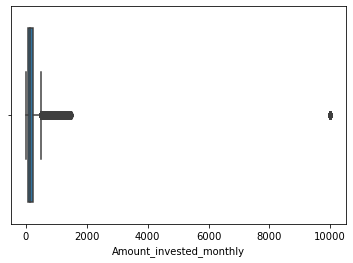

In [113]:
# Outliers-
sns.boxplot(df['Amount_invested_monthly'])

In [114]:
Q1= df['Amount_invested_monthly'].quantile(0.25)
Q3= df['Amount_invested_monthly'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Amount_invested_monthly']>= Q1-1.5*IQR) & (df['Amount_invested_monthly']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Amount_invested_monthly'>

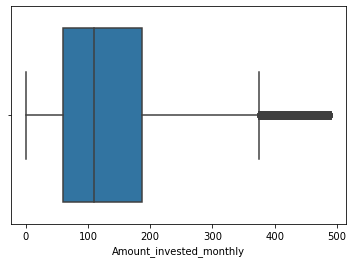

In [115]:
# After remove outlier-
sns.boxplot(df['Amount_invested_monthly'])

In [116]:
# Column--> Payment_Behaviour

df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [117]:
df['Payment_Behaviour']= le.fit_transform(df['Payment_Behaviour'])

In [118]:
df['Payment_Behaviour'].unique()

array([3, 4, 6, 2, 0, 1, 5])

In [119]:
# Collumn--> Monthly_Balance
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '223.45130972736786',
       ..., 496.651610435322, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [120]:
df['Monthly_Balance']= df['Monthly_Balance'].str.replace('_','')

In [121]:
df['Monthly_Balance']= df['Monthly_Balance'].astype(float)

In [122]:
df['Monthly_Balance'].dtype

dtype('float64')

In [123]:
df['Monthly_Balance']= df['Monthly_Balance'].replace(np.nan,0)

<AxesSubplot:xlabel='Monthly_Balance'>

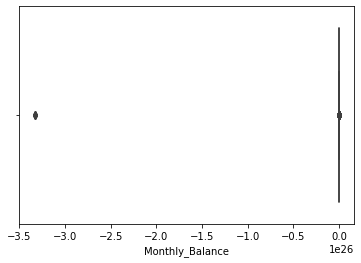

In [124]:
sns.boxplot(df['Monthly_Balance'])

In [125]:
Q1= df['Monthly_Balance'].quantile(0.25)
Q3= df['Monthly_Balance'].quantile(0.75)
IQR= Q3-Q1

df= df[(df['Monthly_Balance']>= Q1-1.5*IQR) & (df['Monthly_Balance']<= Q3+1.5*IQR)]

<AxesSubplot:xlabel='Monthly_Balance'>

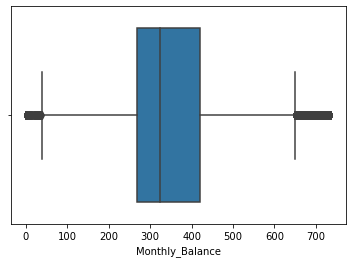

In [126]:
# After removing Outliers-
sns.boxplot(df['Monthly_Balance'])

In [127]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Data Exploration:

In [128]:
df['Credit_Score'].value_counts()

Standard    32507
Poor        17831
Good         9447
Name: Credit_Score, dtype: int64

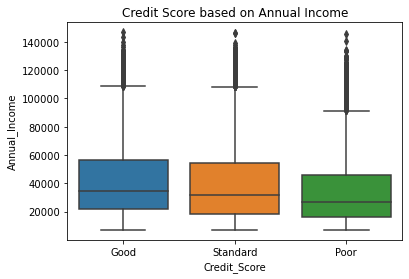

In [129]:
sns.boxplot(x=df['Credit_Score'], y=df['Annual_Income'])
plt.title('Credit Score based on Annual Income')
plt.show()

In this visual we can see the more you earn annually, the better your Credit score is.

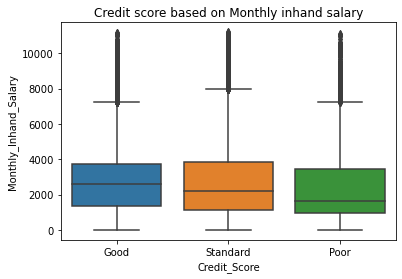

In [130]:
sns.boxplot(x=df['Credit_Score'], y=df['Monthly_Inhand_Salary'])
plt.title('Credit score based on Monthly inhand salary')
plt.show()

The more monthly in-hand salary you earn, the better credit score will become.

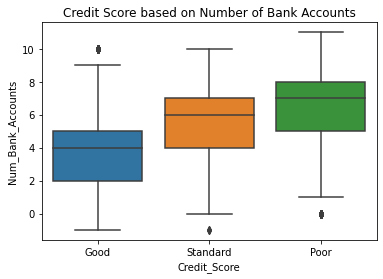

In [131]:
sns.boxplot(x=df['Credit_Score'], y=df['Num_Bank_Accounts'])
plt.title('Credit Score based on Number of Bank Accounts')
plt.show()

Here we can see having more than five Account is not good for having a good credit score. A person
should have 2-3 bank accounts. Having more bank account doesnot positively impact on credit score.

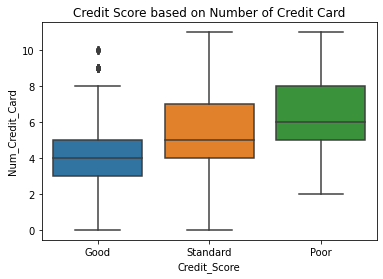

In [132]:
sns.boxplot(x=df['Credit_Score'], y=df['Num_Credit_Card'])
plt.title('Credit Score based on Number of Credit Card')
plt.show()

Having more Credit Card will not impact positively your credit score. Having 3-5 credit card is good 
for your credit score.

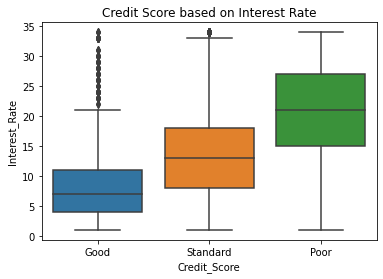

In [133]:
sns.boxplot(x=df['Credit_Score'], y=df['Interest_Rate'])
plt.title('Credit Score based on Interest Rate')
plt.show()

Average Interest Rate 4-10% is good for credit score. Having more Interest Rate is bad for your
credit score.

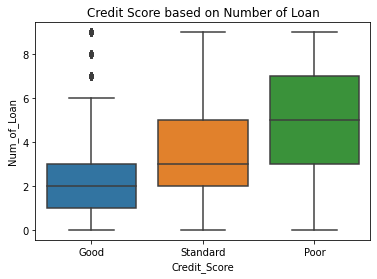

In [134]:
sns.boxplot(x=df['Credit_Score'], y=df['Num_of_Loan'])
plt.title('Credit Score based on Number of Loan')
plt.show()

You should not take more than 1-3 number of loans at a time to have good credit score. Because having 
more than three loans at a time will negatively impact on your credit score.

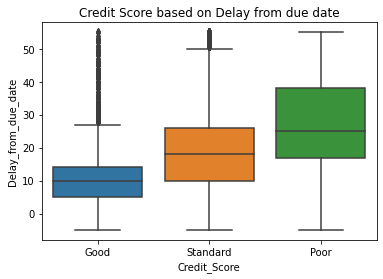

In [135]:
sns.boxplot(x=df['Credit_Score'], y=df['Delay_from_due_date'])
plt.title('Credit Score based on Delay from due date')
plt.show()

You can delay your payment 5-15 days from due date. Delaying your payment more than 15 days from due
date will impact negatively on your credit score.

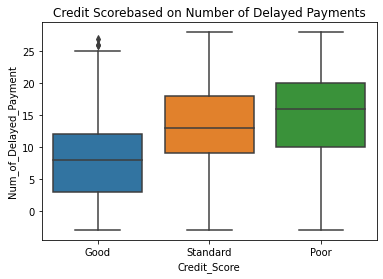

In [136]:
sns.boxplot(x=df['Credit_Score'], y=df['Num_of_Delayed_Payment'])
plt.title('Credit Scorebased on Number of Delayed Payments')
plt.show()

Delaying 4-12 Payments will not affect your credit score. But delying more than 12 Payments from 
due date will affect your credit score negatively.

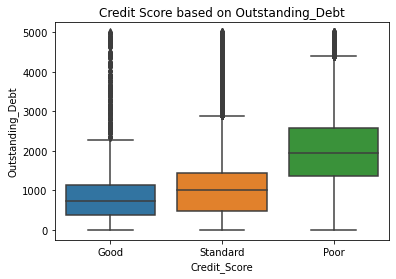

In [137]:
sns.boxplot(x=df['Credit_Score'], y=df['Outstanding_Debt'])
plt.title('Credit Score based on Outstanding_Debt')
plt.show()

An outstanding debt of 400-1100 will not affect your credit score. But more than 1100 debt will
affect your credit score negatively.

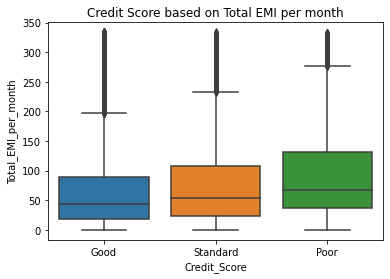

In [138]:
sns.boxplot(x=df['Credit_Score'], y=df['Total_EMI_per_month'])
plt.title('Credit Score based on Total EMI per month')
plt.show()

Here we can see total EMI you are paying per month will not affect much on credit score.

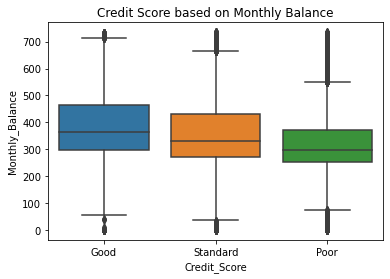

In [139]:
sns.boxplot(x=df['Credit_Score'], y=df['Monthly_Balance'])
plt.title('Credit Score based on Monthly Balance')
plt.show()

Having a high Monthly Balance in your account at the end of the month is good for your credit score.

In [140]:
# Perform Label Encoder to Credit Score column.
df['Credit_Score']= le.fit_transform(df['Credit_Score'])

In [141]:
df['Credit_Score'].value_counts()

2    32507
1    17831
0     9447
Name: Credit_Score, dtype: int64

### Perform ML Model:

In [142]:
x=df[['Month','Age','Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age',
        'Payment_of_Min_Amount','Total_EMI_per_month','Amount_invested_monthly','Payment_Behaviour',
      'Monthly_Balance']]

In [143]:
x.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,1,9,12,19114.12,1824.843333,3,4,3,4,127,...,4.0,2,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089
1,2,9,12,19114.12,0.000000,3,4,3,4,127,...,4.0,1,809.98,31.944960,404,1,49.574949,118.280222,4,284.629162
3,4,9,12,19114.12,0.000000,3,4,3,4,127,...,4.0,1,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310
4,5,9,12,19114.12,1824.843333,3,4,3,4,127,...,4.0,1,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231
5,6,9,12,19114.12,0.000000,3,4,3,4,127,...,4.0,1,809.98,27.262259,187,1,49.574949,62.430172,0,340.479212


In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [145]:
x= scaler.fit_transform(x)

In [146]:
y= df[['Credit_Score']]

In [147]:
from sklearn.model_selection import train_test_split 

In [148]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

### Logistic Regression:

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

In [150]:
lr.fit(x_train,y_train)

LogisticRegression()

In [151]:
y_pred= lr.predict(x_test)

In [152]:
lr_score= accuracy_score(y_pred,y_test)
print('LR Accuracy Score:', lr_score)

LR Accuracy Score: 0.6635443673162165


### Decision Tree Classifier:

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt=DecisionTreeClassifier()

In [155]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [156]:
y_pred= dt.predict(x_test)

In [157]:
dt_score= accuracy_score(y_pred, y_test)
print('DT Accuracy Score:', dt_score)

DT Accuracy Score: 0.691310529397006


### Random Forest Classifier:

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf= RandomForestClassifier()

In [160]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [161]:
y_pred=rf.predict(x_test)

In [162]:
rf_score= accuracy_score(y_pred, y_test)
print('RF Accuracy Score:', rf_score)

RF Accuracy Score: 0.8093167182403613


### Perform PCA:

In [163]:
from sklearn.decomposition import PCA

p = PCA(n_components=0.80)
pca_data = p.fit_transform(x)

In [164]:
pca_data

array([[-1.4877973 , -1.24033579,  0.13234204, ..., -1.01668095,
        -0.02300961, -0.37816702],
       [-1.65841129, -1.70414361,  0.74239394, ..., -1.31237919,
        -0.56209612, -0.3423097 ],
       [-1.37923506, -1.83065695,  1.95913689, ..., -1.15776078,
         0.35285248, -0.18757234],
       ...,
       [-0.97543283, -0.97487071,  0.03474447, ..., -0.58410013,
         0.24923465, -0.03841549],
       [-1.11910378, -0.80814586,  2.14630591, ..., -0.89923821,
         0.13703786, -0.69686268],
       [-0.99548403, -0.53702129,  0.41497643, ..., -0.84965974,
         0.24542792, -0.18784266]])

In [165]:
p.explained_variance_ratio_

array([0.23693111, 0.12136579, 0.06188494, 0.05519873, 0.04725982,
       0.04485142, 0.04403306, 0.04265303, 0.04235853, 0.03959866,
       0.03659262, 0.03035125])

In [166]:
p.n_components_

12

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size= 0.3, random_state=29)

In [168]:
X_train.shape

(41849, 12)

#### Logistic Regression after PCA:

In [169]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [170]:
lr.fit(X_train, y_train)

LogisticRegression()

In [171]:
lr_pred = lr.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score

lr_acc= accuracy_score(lr_pred, y_test)
print('LR Accuracy after PCA:',lr_acc)

LR Accuracy after PCA: 0.6219335414808207


#### Decision Tree after PCA:

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt= DecisionTreeClassifier()

In [175]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
pred_dt= dt.predict(X_test)

In [177]:
dt_acc= accuracy_score(pred_dt, y_test)
print('DT Accuracy after PCA:', dt_acc)

DT Accuracy after PCA: 0.5913804638715433


### Random Forest After PCA:

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
rf_acc= accuracy_score(pred_rf, y_test)
print('RF Accuracy After PCA:', rf_acc)

## Perform LDA:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)    # n_components= no. of classes-1
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test) 

In [ ]:
X_train.shape

### Logistic Regression After LDA:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr= LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr_pred= lr.predict(X_test)

In [ ]:
lr_acc= accuracy_score(lr_pred, y_test)
print('LR Accuracy after LDA:', lr_acc)

### Decision Tree After LDA:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
pred_dt= dt.predict(X_test)

In [ ]:
dt_acc= accuracy_score(pred_dt, y_test)
print('DT Accuracy after LDA:', dt_acc)

### Random Forest After LDA:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
pred_rf= rf.predict(X_test)

In [ ]:
rf_acc= accuracy_score(pred_rf, y_test)
print('RF Accuracy after LDA:', rf_acc)

### Summarize all Accuracies after perform different ML Algorithms & Feature Extraction Technique:

### Accuracy after perform diff ML Algo:
    Logistic Reg: 66.35%
    Decision Tree: 69.18%
    Random Forest: 80.69%   (Highest Accuracy)

### Accuracy after perform PCA:
    Logistic Reg: 62.19%
    Decision Tree: 59.04%
    Random Forest: 69.27%

### Accuracy after perform LDA:
    Logistic Reg: 62.12%
    Decision Tree: 55.19%
    Random Forest: 61.10%